In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

plt.style.use("tableau-colorblind10")


# モデル

$$
y_i = 1 + 2 x_i + \varepsilon_i \\
\varepsilon_i \sim \mathcal{N}(0, 3 x_i + 1)
$$

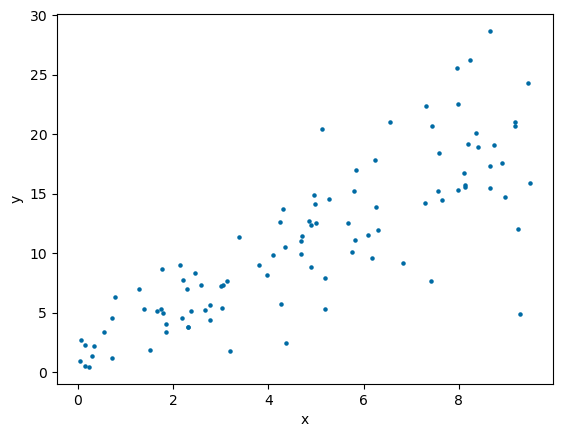

In [2]:
N = 100
rng = np.random.default_rng(123)

x = rng.uniform(0, 10, size=N)
eps = rng.normal(loc=0, scale=np.sqrt(3 * x + 1), size=N)
y = 1 + 2 * x + eps

plt.scatter(x, y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
df = pd.DataFrame.from_dict({"y": y, "x": x})
df.to_csv("toy_data.csv", index=False)


# OLS

In [4]:
ols = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.75e-26
Time:                        15:16:57   Log-Likelihood:                -272.54
No. Observations:                 100   AIC:                             549.1
Df Residuals:                      98   BIC:                             554.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6411      0.736      2.231      0.028       0.181       3.101
x1             1.9391      0.132     14.678      0.000       1.677       2.201
==============================================================================
Omnibus:                       10.896   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               24.173
Skew:                          -0.274   Prob(JB):                     5.63e-06
Kurtosis:                       5.346   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

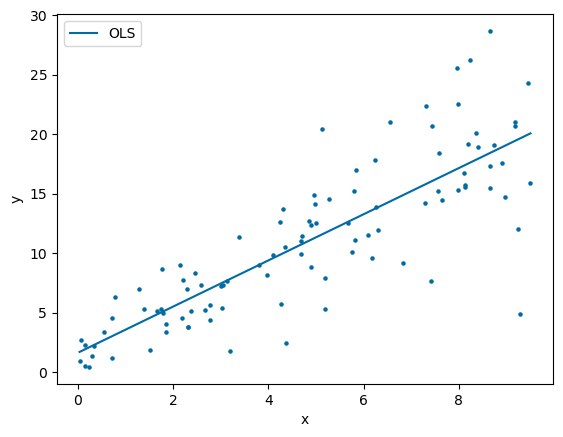

In [5]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
plt.plot(x_line, ols.predict(sm.add_constant(x_line)), label="OLS")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 分位点回帰を行う

ドキュメント：https://www.statsmodels.org/dev/generated/statsmodels.regression.quantile_regression.QuantReg.html

In [6]:
# 分位点(%)
qs = [2.5, 25, 50, 75, 97.5]

qr_models = dict()
for q in qs:
    qr_models[q] = sm.QuantReg(endog=y, exog=sm.add_constant(x)).fit(q=q / 100)


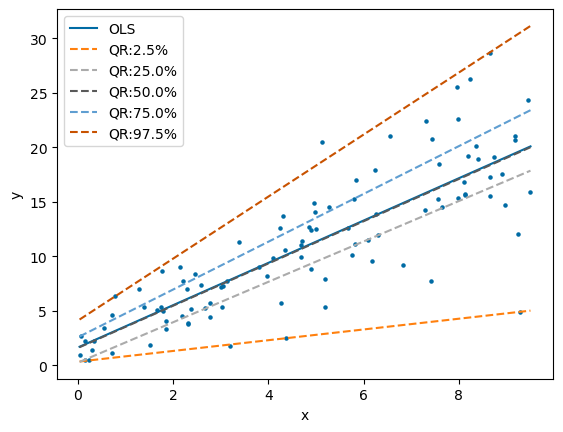

In [7]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
plt.plot(x_line, ols.predict(sm.add_constant(x_line)), label="OLS")

for q in qs:
    plt.plot(
        x_line,
        qr_models[q].predict(sm.add_constant(x_line)),
        ls="--",
        label="QR:{:.1f}%".format(q),
    )

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
